IMPORTING THE IMPORTANT LIABRARIES NOTE: TO MAKE MODEL LOOK MORE SIMPLER THIS TIME I AM NOT GONNA WORK WITH DIFFRENT MODULES SO WE WILL BE DOING SPLIT LOADING OF DATA TRANSFORMATION AND MODEL TRAINING AND THE CONCLUSION OVER THE SAME NOTEBOOK.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

1.1 FIRST OF ALL LOADING THE DATASET.

In [2]:
df = pd.read_csv("../telecom_churn.csv")

In [3]:
# printing the top 3 rows of the data to check data is sucessfully loading in data frame df
df.head(3)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2


NOW WE GONNA APPLY SOME PREPROCESSING BEFORE THAT WE NEED TO FILTER OUT THE NUMERICAL AND THE CATEGORICAL COLUMN OUT OF THE DATA THEN WE WILL BE DOING THE PREPROCESSING FOR THEM SEPARATELY.

In [4]:
df.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

ONE IMPORTANT THING TO NOTE DOWN ABOUT THE DATA IS WE DO HAVE CATEGORICAL FEATURES BUT THEY ARE ALREADY BINARY NUMBERS SO WE DONT NEED TO USE ANY FEATURE TRANSFORMATION FOR THEM.

In [5]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [ ]:
cat_cols = ['ContractRenewal','DataPlan']
num_cols = ['AccountWeeks','DataUsage','CustServCalls','DayMins','MonthlyCharge''OverageFee','RoamMins','DayCalls']
target = 'Churn'

NOW GONNA CREATE A PIPELINE FOR THE TRANSFORMATION OF THE DATA.NUM_PIPELINE FOR THE NUMERICAL FEATURE AND CATEGORICAL FOR THE CATEGORICAL FEATURE.

FIRST OF ALL SPLITTING THE DATA INTO TEST AND THE TRAIN DATASET.

In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [8]:
cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent'))
])

In [9]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

NOW USING THE COLUMN TRANSFORMER AND COMBINING BOTH THE PIPELINES.

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

CREATING THE CUSTOM NEURAL NETWORK SO THERE WILL BE TOTAL 3 NO OF LAYERS 2 HIDDEN AND 1 OUTPUT LAYER 1ST HIDDEN HAS 64 NEURONS AND TOTAL NO OF FEATURES ARE 10 SO WEIGHT Z WILL BE 64*10 WHERE WEIGHTS WILL BE 64*10 AND BIAS WILL BE 64, OUTPUT WILL BE A1 WHICH WILL BE THE INPUT FOR THE NEXT HIDDEN LAYER AND AT THE END WE WILL BE GETTING A SINGLE OUTPUT AFTER USING SIGMOID OUTPUT WILL BE A PROBABLITY AND WE GONNA USE THE THRESHOLD VALUE TO PREDICT WETHER THE CUSTOMER IS CHURNED OR NOT.

In [11]:
def build_nn(input_dim):
    model = Sequential()

    # Hidden layer 1
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))   # overfitting control

    # Hidden layer 2
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

    

NOW WE HAVE CREATED A SMALL NEURAL NETWORK NOW WE CAN FIT AND TRANFORM THE DATA FOR THE TRAIN SET AND TRANSFORM THE TEST SET AND THEN CAN CHECK THE PREDICTION.

In [12]:
X_train_t = preprocessor.fit_transform(X_train)
X_test_t  = preprocessor.transform(X_test)


In [13]:
nn_model = build_nn(input_dim=X_train_t.shape[1])

history = nn_model.fit(
    X_train_t,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

c:\Users\Pallavi\OneDrive\Documents\artificial_nn\nn_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7856 - loss: 0.5242 - val_accuracy: 0.8408 - val_loss: 0.4202
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8579 - loss: 0.3797 - val_accuracy: 0.8464 - val_loss: 0.3589
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8663 - loss: 0.3455 - val_accuracy: 0.8783 - val_loss: 0.3242
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8710 - loss: 0.3232 - val_accuracy: 0.8764 - val_loss: 0.3020
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8785 - loss: 0.3025 - val_accuracy: 0.8876 - val_loss: 0.2827
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8921 - loss: 0.2848 - val_accuracy: 0.8914 - val_loss: 0.2731
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8954 - loss: 0.2769 - val_accuracy: 0.8858 - val_loss: 0.2720
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8912 - loss: 0.2769 - val_accuracy: 0.8858 - val_loss:

In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

AS OF NOW WE MADE 50 DIFFRENT EPOCHS WE HAVE BATCH SIZE OF 32 AND FOR EACH BATCH THERE ARE M NO OF ENTRIES AND IN A SINGLE EPOCH WE GONNA RUN ALL THE 32 BATCH AND EACH EPOCH WILL LEARN THE WIGHTS FROM THE PREVIOUS EPOCH AND WILL GET BETTER.NOW WE HAVE OUTPUT FROM OUR MODEL WHICH HAS 'accuracy', 'loss', 'val_accuracy', 'val_loss' IN VAL = VALIDATION WHICH WE HAVE SEPARATED FROM THE TRAINING SET DURING TRAINING THE MODEL.
NOW WE GONNA PLOT GRAPHS FOR LOSS AND ACCURACY FOR BOTH TRAINING AND THE VALIDATION SET.

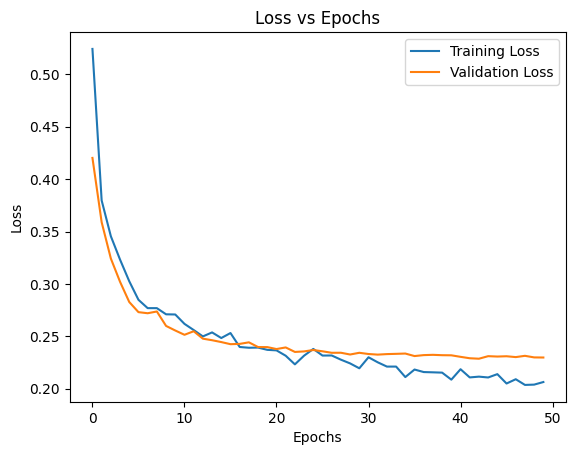

In [18]:
# FIRST PLOTTING FOR THE LOSS FUNCTION 

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

We can observe that at the beginning, the training loss is quite high due to random weight initialization. As the model starts learning from the data through backpropagation, both the training and validation performance improve. However, at a certain point, the training loss continues to decrease at a faster rate, while the validation loss improves only marginally . This behavior indicates the onset of overfitting, where the model begins to memorize the training data instead of generalizing well to unseen data.

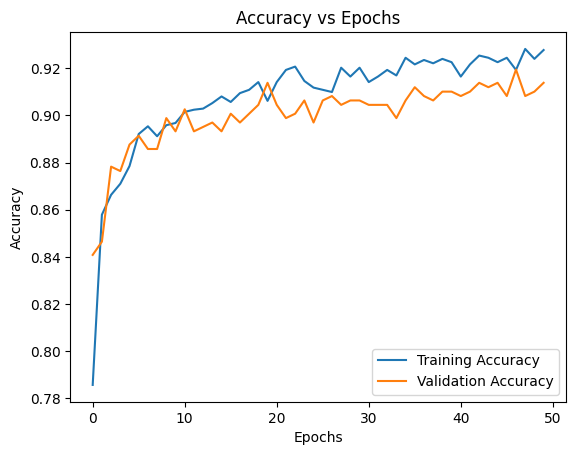

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

Accuracy insight:
Initially, the training accuracy is quite low due to random weight initialization. As training progresses, the model learns meaningful patterns from the data, leading to a steady improvement in training accuracy. The validation accuracy also improves in the early stages; however, after a certain number of epochs, its rate of improvement becomes slower compared to the training accuracy. This divergence suggests that the model is starting to overfit, as it continues to perform better on the training data while showing limited improvement on unseen validation data.

NOW IT IS TIME TO TEST THE DATA ON THE TEST SET

In [20]:
nn_model.predict(X_test_t)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


array([[0.26362437],
       [0.01454342],
       [0.3316986 ],
       [0.03541203],
       [0.05137233],
       [0.01002569],
       [0.03172419],
       [0.01612437],
       [0.02426252],
       [0.01610859],
       [0.02602662],
       [0.01340411],
       [0.05381255],
       [0.75579625],
       [0.01413414],
       [0.01859586],
       [0.01177991],
       [0.01059844],
       [0.00971303],
       [0.02474412],
       [0.02042759],
       [0.01316801],
       [0.01389675],
       [0.19392201],
       [0.02200878],
       [0.01336269],
       [0.27023652],
       [0.72925216],
       [0.02918288],
       [0.0076041 ],
       [0.0147241 ],
       [0.01162073],
       [0.0707619 ],
       [0.00746167],
       [0.01051707],
       [0.02414453],
       [0.03450299],
       [0.02375922],
       [0.03320682],
       [0.03578275],
       [0.03356834],
       [0.03020236],
       [0.03151514],
       [0.02042994],
       [0.83054334],
       [0.04598897],
       [0.4873259 ],
       [0.010

In [22]:
x_sample = X_test_t[0].reshape(1, -1)

# Prediction
prob = nn_model.predict(x_sample)
pred = (prob > 0.5).astype(int)

print(prob, pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.26362443]] [[0]]
